About the data: The dataset contains 2 folders: yes and no which contains 253 Brain MRI Images. The folder yes contains 155 Brain MRI Images that are tumorous andno contains 98 Brain MRI Images that are non-tumorous.

In [72]:
# Importing Libraries

In [25]:
import os
import glob
import io
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras import Sequential,models,layers
from tensorflow.keras.preprocessing import image
from numpy import asarray
import cv2
import PIL
from PIL import Image


# Image Preprocessing 
# converting specifying imagepath and converting image int array

In [26]:
#img_dir=r'C:\Users\chapp\Downloads\'
no_images=os.listdir(r'C:\Users\chapp\Downloads\braintumour\no')
yes_images=os.listdir(r'C:\Users\chapp\Downloads\braintumour\yes')

In [34]:
datset=[]
lab=[]

In [35]:
for image_name in (no_images):
    s=r"C:\Users\chapp\Downloads\braintumour\no\\"
    path=(s +image_name)
    print(path)   
    if path==r'C:\Users\chapp\Downloads\braintumour\no\\desktop.ini':
        continue
    image=cv2.imread(path)
    image=Image.fromarray(image,'RGB')
    image=image.resize((64,64))
    datset.append(np.array(image))
    lab.append(0)
    #C:\Users\chapp\Downloads\braintumour\no\No1.jpeg

C:\Users\chapp\Downloads\braintumour\no\\10 no.jpg
C:\Users\chapp\Downloads\braintumour\no\\11 no.jpg
C:\Users\chapp\Downloads\braintumour\no\\12 no.jpg
C:\Users\chapp\Downloads\braintumour\no\\13 no.jpg
C:\Users\chapp\Downloads\braintumour\no\\14 no.jpg
C:\Users\chapp\Downloads\braintumour\no\\15 no.jpg
C:\Users\chapp\Downloads\braintumour\no\\17 no.jpg
C:\Users\chapp\Downloads\braintumour\no\\18 no.jpg
C:\Users\chapp\Downloads\braintumour\no\\19 no.jpg
C:\Users\chapp\Downloads\braintumour\no\\20 no.jpg
C:\Users\chapp\Downloads\braintumour\no\\21 no.jpg
C:\Users\chapp\Downloads\braintumour\no\\22 no.jpg
C:\Users\chapp\Downloads\braintumour\no\\23 no.jpg
C:\Users\chapp\Downloads\braintumour\no\\24 no.jpg
C:\Users\chapp\Downloads\braintumour\no\\25 no.jpg
C:\Users\chapp\Downloads\braintumour\no\\26 no.jpg
C:\Users\chapp\Downloads\braintumour\no\\27 no.jpg
C:\Users\chapp\Downloads\braintumour\no\\28 no.jpg
C:\Users\chapp\Downloads\braintumour\no\\29 no.jpg
C:\Users\chapp\Downloads\braint

In [36]:
for image_name in yes_images:
    s=r"C:\Users\chapp\Downloads\braintumour\yes\\"
    path=(s +image_name)
    print(path)   
    if path==r'C:\Users\chapp\Downloads\braintumour\yes\\desktop.ini':
        continue
  
    image=cv2.imread(path)
    image=Image.fromarray(image,'RGB')
    image=image.resize((64,64))
    datset.append(np.array(image))
    lab.append(1)

C:\Users\chapp\Downloads\braintumour\yes\\Y1.jpg
C:\Users\chapp\Downloads\braintumour\yes\\Y10.jpg
C:\Users\chapp\Downloads\braintumour\yes\\Y100.JPG
C:\Users\chapp\Downloads\braintumour\yes\\Y101.jpg
C:\Users\chapp\Downloads\braintumour\yes\\Y102.jpg
C:\Users\chapp\Downloads\braintumour\yes\\Y103.jpg
C:\Users\chapp\Downloads\braintumour\yes\\Y104.jpg
C:\Users\chapp\Downloads\braintumour\yes\\Y105.jpg
C:\Users\chapp\Downloads\braintumour\yes\\Y106.jpg
C:\Users\chapp\Downloads\braintumour\yes\\Y107.jpg
C:\Users\chapp\Downloads\braintumour\yes\\Y108.jpg
C:\Users\chapp\Downloads\braintumour\yes\\Y109.JPG
C:\Users\chapp\Downloads\braintumour\yes\\Y11.jpg
C:\Users\chapp\Downloads\braintumour\yes\\Y111.JPG
C:\Users\chapp\Downloads\braintumour\yes\\Y112.JPG
C:\Users\chapp\Downloads\braintumour\yes\\Y113.JPG
C:\Users\chapp\Downloads\braintumour\yes\\Y114.JPG
C:\Users\chapp\Downloads\braintumour\yes\\Y115.JPG
C:\Users\chapp\Downloads\braintumour\yes\\Y116.JPG
C:\Users\chapp\Downloads\braintumou

In [37]:
data=np.asarray(datset)
l=np.asarray(lab)

In [38]:
print(data.shape, l.shape)

(253, 64, 64, 3) (253,)


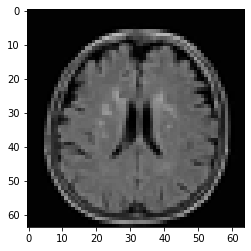

In [71]:
plt.imshow(data[6])

# # Model Training

In [40]:
model=Sequential([
                     
                     #cnn
                    layers.Conv2D(50,(3,3),activation="relu",input_shape=(64,64,3)),
                    layers.MaxPooling2D((2,2)),
     
                    layers.Conv2D(64,(3,3),activation="relu"),
                    layers.MaxPooling2D((2,2)),
    
                    layers.Conv2D(54,(3,3),activation="relu"),
                    layers.MaxPooling2D((2,2)),
    
                     #dense_layer
                     layers.Flatten(),
                     layers.Dense(64,activation="relu"),
                     layers.Dense(2,activation="softmax")


])

In [42]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(data,l,epochs=10)

Epoch 1/10
8/8 [==============================] - 1s 83ms/step - loss: 0.5306 - accuracy: 0.8063
Epoch 2/10
8/8 [==============================] - 1s 84ms/step - loss: 0.4486 - accuracy: 0.7905
Epoch 3/10
8/8 [==============================] - 1s 82ms/step - loss: 0.3439 - accuracy: 0.8419
Epoch 4/10
8/8 [==============================] - 1s 83ms/step - loss: 0.2573 - accuracy: 0.9170
Epoch 5/10
8/8 [==============================] - 1s 82ms/step - loss: 0.1974 - accuracy: 0.9249
Epoch 6/10
8/8 [==============================] - 1s 82ms/step - loss: 0.1266 - accuracy: 0.9565
Epoch 7/10
8/8 [==============================] - 1s 83ms/step - loss: 0.0718 - accuracy: 0.9881
Epoch 8/10
8/8 [==============================] - 1s 87ms/step - loss: 0.0411 - accuracy: 0.9960
Epoch 9/10
8/8 [==============================] - 1s 84ms/step - loss: 0.0270 - accuracy: 1.0000
Epoch 10/10
8/8 [==============================] - 1s 85ms/step - loss: 0.0153 - accuracy: 0.9960


In [43]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(data,l,epochs=9)

Epoch 1/9
8/8 [==============================] - 1s 83ms/step - loss: 0.1283 - accuracy: 0.9526
Epoch 2/9
8/8 [==============================] - 1s 86ms/step - loss: 0.0804 - accuracy: 0.9605
Epoch 3/9
8/8 [==============================] - 1s 88ms/step - loss: 0.0476 - accuracy: 0.9881
Epoch 4/9
8/8 [==============================] - 1s 91ms/step - loss: 0.0225 - accuracy: 0.9921
Epoch 5/9
8/8 [==============================] - 1s 94ms/step - loss: 0.0218 - accuracy: 0.9921
Epoch 6/9
8/8 [==============================] - 1s 91ms/step - loss: 0.0137 - accuracy: 0.9960
Epoch 7/9
8/8 [==============================] - 1s 89ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 8/9
8/8 [==============================] - 1s 87ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 9/9
8/8 [==============================] - 1s 89ms/step - loss: 0.0015 - accuracy: 1.0000 0s - loss: 0.0022 - ac


# Preparing predction images

In [49]:
pred_set=[]
pred_images=os.listdir(r'C:\Users\chapp\Downloads\braintumour\pred\\')
for image_name in pred_images:
    image=cv2.imread(r'C:\Users\chapp\Downloads\braintumour\pred\\'+ image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((64,64))
    pred_set.append(np.array(image))
pred=np.asarray(pred_set)

In [50]:
x=model.predict(pred)
max=np.argmax(x,axis=1)

In [52]:
x

array([[9.99946952e-01, 5.29909230e-05],
       [9.95391965e-01, 4.60804300e-03],
       [1.00000000e+00, 3.98820884e-16],
       [1.00000000e+00, 3.78855142e-11],
       [1.00000000e+00, 2.51321794e-19],
       [1.00000000e+00, 7.75452896e-11],
       [9.99978185e-01, 2.18205532e-05],
       [9.99893546e-01, 1.06487045e-04],
       [1.00000000e+00, 2.43665488e-09],
       [9.99999881e-01, 7.30887706e-08],
       [9.96024013e-01, 3.97599023e-03],
       [9.99998569e-01, 1.39273914e-06],
       [9.99967694e-01, 3.22486267e-05],
       [9.99730408e-01, 2.69599957e-04],
       [9.99787271e-01, 2.12752813e-04],
       [9.99741375e-01, 2.58656160e-04],
       [1.00000000e+00, 1.97749889e-12],
       [9.99309659e-01, 6.90382265e-04],
       [9.99893546e-01, 1.06487045e-04],
       [9.96090472e-01, 3.90946632e-03],
       [9.99997020e-01, 2.98490113e-06],
       [9.99986768e-01, 1.31760971e-05],
       [9.99328017e-01, 6.71967515e-04],
       [9.99510765e-01, 4.89184691e-04],
       [1.000000

In [51]:
max

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

# Prediction

result: 0


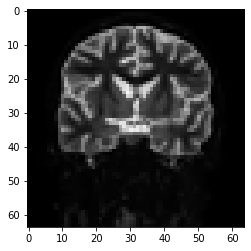

In [67]:
plt.imshow(pred[9])
print("result:",max[9])

result: 0


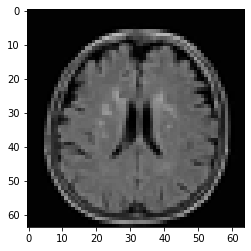

In [68]:
plt.imshow(pred[18])
print("result:",max[18])

0


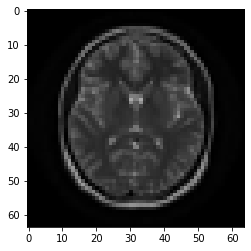

In [61]:
plt.imshow(pred[42])
print("result:",max[42])

0


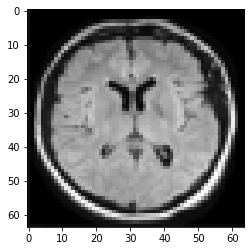

In [62]:
plt.imshow(pred[55])
print("result:",max[55])

result: 1


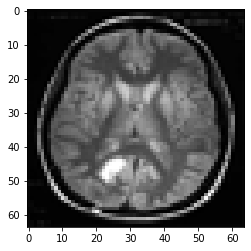

In [69]:
plt.imshow(pred[129])
print("result:",max[129])

result: 1


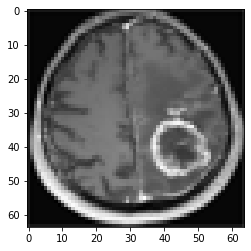

In [70]:
plt.imshow(pred[150])
print("result:",max[150])

# #All the images are correctly predicted

In [ ]:
#All the images are correctly predicted by checking in directory and comparing with max